# Project: Investigate a Dataset - [TMDb - Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about ***10,000*** movies collected from The Movie Database ***[(TMDb)](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1538364550547000)***, including user ratings and revenue in a CSV file called *`'tmdb-movies.csv'`*.
        
        - id                   >> A unique identifier for each movie.
        - imdb_id              >> A unique identifier for each movie on IMDB.
        - popularity           >> A numeric quantity specifying the movie popularity.
        - budget               >> The budget in which the movie was made.
        - revenue              >> The worldwide revenue generated by the movie.
        - original_title       >> The title of the movie before translation or adaptation.
        - cast                 >> The name of lead and supporting actors.
        - homepage             >> A link to the homepage of the movie.
        - director             >> the director of the movie
        - tagline              >> Movie's tagline.
        - keywords             >> The keywords or tags related to the movie.        
        - overview             >> A brief description of the movie.
        - run_time             >> Duration of the movie in minutes.
        - genre                >> The genre of the movie, Action, Comedy ,Thriller etc.
        - production_companies >> The production house of the movie.
        - runtime              >> The running time of the movie in minutes.
        - release_date         >> The date on which it was released.
        - vote_count           >> number of viewer that ratedthe movie.
        - vote_average         >> average ratings the movie recieved.
        - release_year         >> the year in which the movie released
        - budget_adj           >> shows the budget associated movie in terms of 2010 dollars.
        - revenue_adj          >> shows the revenue associated movie in terms of 2010 dollars.


### Question(s) for Analysis
>- What's the relation between the budget and revenue
>- How dose the movies cost changed with the time
>- relationship between runtime and population (cost, revenue)
>- how does runtime changed with time
>- difference between number of movies released before and after 2000
>- what's the most popular month in which the movies released

In [1]:
#pakages that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,"Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.",124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,"An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.",120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,http://www.starwars.com/films/star-wars-episode-vii,J.J. Abrams,Every generation has a story.,...,"Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers.",136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother.,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
movies_befor2000 = df.query('release_year < 2000').shape[0]
movies_after2000 = df.query('release_year >= 2000').shape[0]
print('Numebr of movies befor year 2000 is: "{}" movies.\nWhen Numebr of movies after year 2000 is: "{}" movies.'.format(movies_befor2000, movies_after2000))

Numebr of movies befor year 2000 is: "3698" movies.
When Numebr of movies after year 2000 is: "7168" movies.


#### Notes
>- We notice that there are many movies has zero budget and zero revenue.
>- There is also movies has runtime equal zero which dosen't make sence.
>- From the ***`vote_count std`*** we can notice that it's high which wont be fair to compair the movies according to the vote average.
>- The first movie in our list released in 1960 and the last one in 2015.
>- Number of movies before 2000 is about the half of it after 2000


### Data Cleaning
>- there are many raws that wont help us in our analysis like ('id', 'imdb_id', 'original_title', 'cast', 'home_page', 'overview', 'tagline', 'keywords', 'production_companies', 'vote_count', 'vote_avereage')
>- I will use budget_adj and revenue_adj not budget and revenue so that we can get fair comparison.
>- We will remove duplicates and NANs
>- I will execlude movies that have zero budget and revenue from my analysis to get accurate relationship.
>- From genres I will only include the first catagory in my analysis.

In [7]:
# Now I will remove the not useful raws
df.drop([ 'id', 'imdb_id', 'budget', 'revenue', 'homepage', 'original_title', 'cast', 'tagline',
         'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [8]:
df.head()

,popularity,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,James Wan,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09


In [9]:
df.shape

(10866, 8)

>After deleting the unwanted columns now I remove duplicates and NANs

In [10]:
print('Num. of duplicated Raws is: ',df.duplicated().sum())

Num. of duplicated Raws is:  1


In [11]:
#Removing Duplications
df.drop_duplicates(inplace=True)
df.shape

(10865, 8)

In [12]:
#Removing NANs
df.isnull().sum().sum()

67

In [13]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [14]:
df.shape

(10800, 8)

> Now we will remove movies with budget, revenue and runtime which equal `zero`

In [15]:
rev_0 = df.query('revenue_adj == 0').shape[0]
bud_0 = df.query('budget_adj == 0').shape[0]
runt_0 = df.query('runtime == 0').shape[0]
print('No. of Movies with Revenue equal to zero is : {} \nNo. of Movies with Budget equal to zero is : {} \nNo. of Movies with Runtime equal to zero is : {} '.format(rev_0, bud_0, runt_0))

No. of Movies with Revenue equal to zero is : 5952 
No. of Movies with Budget equal to zero is : 5636 
No. of Movies with Runtime equal to zero is : 28 


In [16]:
#Removing zeros
df = df.replace(0, np.nan)

In [17]:
df.dropna(inplace=True)
df.shape

(3853, 8)

>**Now I will fix genres**

In [18]:
fix_gen = df[df['genres'].str.contains("|")]
df1 = fix_gen.copy()

In [19]:
df1['genres'] = df1['genres'].apply(lambda x: x.split("|")[0])
df1.head()

,popularity,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Colin Trevorrow,124.0,Action,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,George Miller,120.0,Action,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,Robert Schwentke,119.0,Adventure,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,J.J. Abrams,136.0,Action,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,James Wan,137.0,Action,4/1/15,2015,1.747999e+08,1.385749e+09


>**Now I will convert the releasing date**

In [20]:
df = df1
df.head()

,popularity,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Colin Trevorrow,124.0,Action,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,George Miller,120.0,Action,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,Robert Schwentke,119.0,Adventure,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,J.J. Abrams,136.0,Action,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,James Wan,137.0,Action,4/1/15,2015,1.747999e+08,1.385749e+09


In [21]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    3853 non-null   float64       
 1   director      3853 non-null   object        
 2   runtime       3853 non-null   float64       
 3   genres        3853 non-null   object        
 4   release_date  3853 non-null   datetime64[ns]
 5   release_year  3853 non-null   int64         
 6   budget_adj    3853 non-null   float64       
 7   revenue_adj   3853 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 270.9+ KB


#### Now our data is clean
> **So I will save a copy `'tmdb-movies_clean.csv'`as a buckup

In [22]:
df.to_csv('tmdb-movies_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Now and with my cleaned data I will explore the data to answer the questions and make some plots to figure out the relationship between the different variables**

### Research Question 1 (What's the relation between the budget and revenue)

In [23]:
# I will make column for the profit
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head()

,popularity,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj,profit
0,32.985763,Colin Trevorrow,124.0,Action,2015-06-09,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,George Miller,120.0,Action,2015-05-13,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Robert Schwentke,119.0,Adventure,2015-03-18,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,J.J. Abrams,136.0,Action,2015-12-15,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,James Wan,137.0,Action,2015-04-01,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [24]:
succ_movies = df.query('profit > 0')
los_movies = df.query('profit < 0')
lable = ('Profitable Movies', 'Unprofitable Movies')
print('No. of profitable Movies is : {} \nNo. of unprofitable Movies : {}'.format(succ_movies.shape[0], los_movies.shape[0]))

No. of profitable Movies is : 2777 
No. of unprofitable Movies : 1072


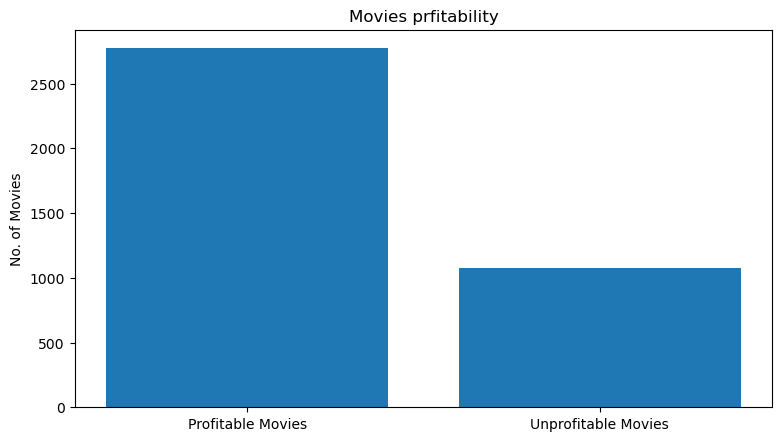

In [25]:
plt.figure(figsize=(9,5), dpi = 100)
plt.bar(lable, [succ_movies.shape[0], los_movies.shape[0]])
plt.title('Movies prfitability')
plt.ylabel('No. of Movies');

In [26]:
prof_avg = int(df.query('profit > 0').profit.mean())
los_avg = int(df.query('profit < 0').profit.mean())
print('The mean of profit is : {} $\nThe mean of losses is : {} $'.format(prof_avg,los_avg * -1))

The mean of profit is : 135446485 $
The mean of losses is : 17159900 $


In [27]:
print('No. of profitable movies before 2000 is : {} \nNo. of profitable movies after 2000 is : {} '
      .format(succ_movies.query('release_year < 2000').shape[0], succ_movies.query('release_year > 2000').shape[0]))

No. of profitable movies before 2000 is : 1027 
No. of profitable movies after 2000 is : 1675 


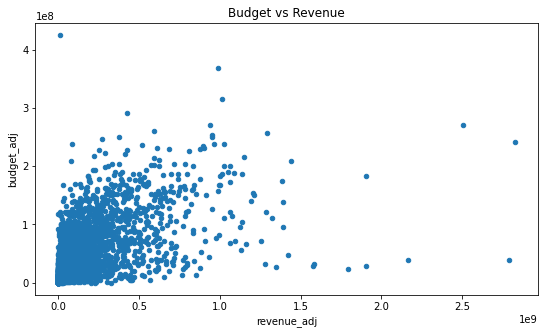

In [28]:
df.plot(x='revenue_adj',y='budget_adj',kind='scatter',figsize=(9,5))
plt.title('Budget vs Revenue');

>- Now we notice that the No. of profitable movies is douple of the unprofitable
>- The Movies after 2000 become more profitable

### Research Question 2 (How dose the movies cost changed with the time)

In [29]:
RB_year = df.groupby('release_year')['revenue_adj', 'budget_adj','profit'].sum()
RB_year = RB_year.sort_values(by='profit', ascending=False, na_position='last')
RB_year

C:\Users\zainkw\AppData\Local\Temp/ipykernel_21480/2923982289.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  RB_year = df.groupby('release_year')['revenue_adj', 'budget_adj','profit'].sum()


,revenue_adj,budget_adj,profit
release_year,,,
2015,2.410668e+10,6.597112e+09,1.750957e+10
2012,2.296905e+10,7.206290e+09,1.576276e+10
2014,2.217063e+10,6.810334e+09,1.536030e+10
2013,2.279304e+10,8.019861e+09,1.477317e+10
2011,2.269191e+10,8.183223e+09,1.450868e+10
...,...,...,...
1962,1.487318e+09,2.843733e+08,1.202945e+09
1968,1.393100e+09,3.382106e+08,1.054890e+09
1963,1.256903e+09,4.351498e+08,8.217533e+08


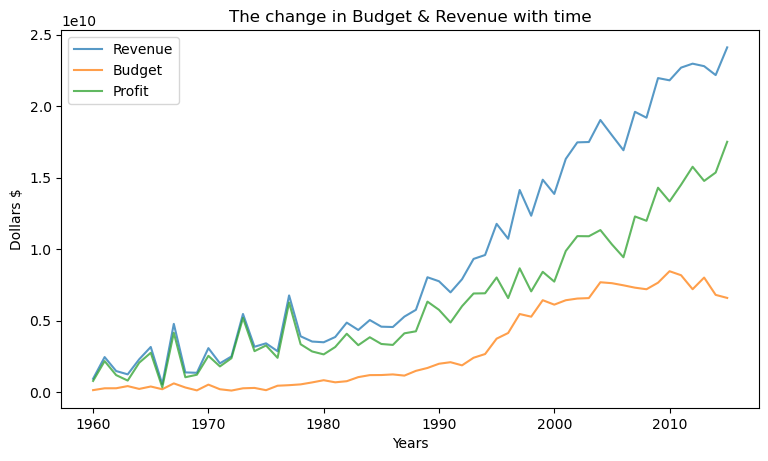

In [30]:
#sorting and making agroup by years
df = df.sort_values(by='release_year', ascending=True, na_position='last')
R_year = df.groupby('release_year')['revenue_adj'].sum()
B_year = df.groupby('release_year')['budget_adj'].sum()
P_year = df.groupby('release_year')['profit'].sum()

#ploting
plt.figure(figsize=(9,5), dpi = 100)
plt.plot(R_year, alpha=0.75, label='Revenue')
plt.plot(B_year, alpha=0.75, label='Budget')
plt.plot(P_year, alpha=0.75, label='Profit')
plt.title('The change in Budget & Revenue with time')
plt.xlabel('Years')
plt.ylabel('Dollars $')
plt.legend();

>- We notice that in 90th and after production companies paid much more in this industry which brought higher revenues

### Research Question 3,4  (How does runtime changed with time & relationship between runtime (cost, revenue)?)

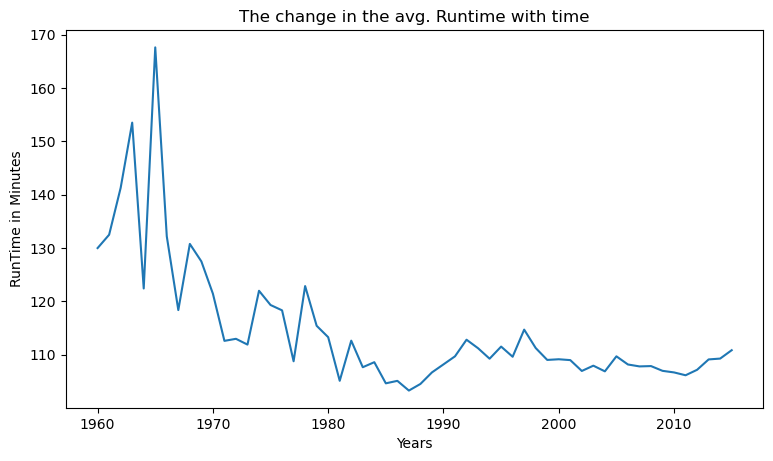

In [31]:
runtime_year = df.groupby('release_year')['runtime'].mean()

#plotting
plt.figure(figsize=(9,5), dpi = 100)
plt.plot(runtime_year)
plt.xlabel('Years')
plt.ylabel('RunTime in Minutes')
plt.title('The change in the avg. Runtime with time');

>**Its clear that in the past the average runtime was long not like these days**

In [32]:
R_avg_year = df.groupby('release_year')['revenue_adj'].mean()
B_avg_year = df.groupby('release_year')['budget_adj'].mean()
P_avg_year = df.groupby('release_year')['profit'].mean()

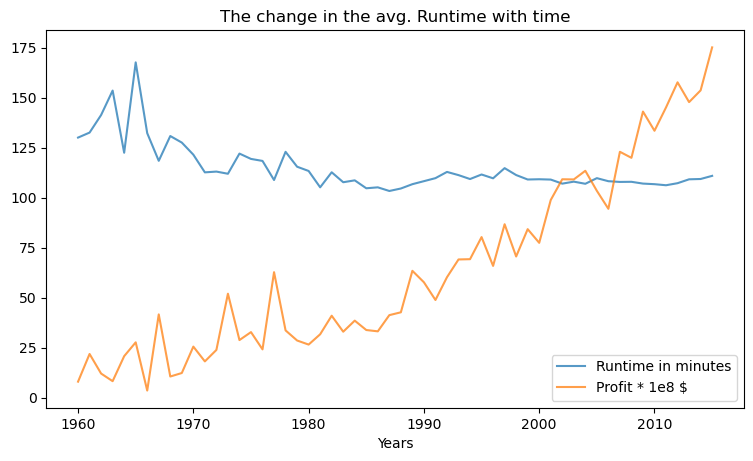

In [33]:
plt.figure(figsize=(9,5), dpi = 100)
plt.plot(runtime_year, alpha=0.75, label='Runtime in minutes')
#plt.plot(R_year/100000000, alpha=0.75, label='Revenue')
#plt.plot(B_year, alpha=0.75, label='Budget')
plt.plot(P_year/1e8, alpha=0.75, label='Profit * 1e8 $')
plt.xlabel('Years')
plt.title('The change in the avg. Runtime with time')
plt.legend();

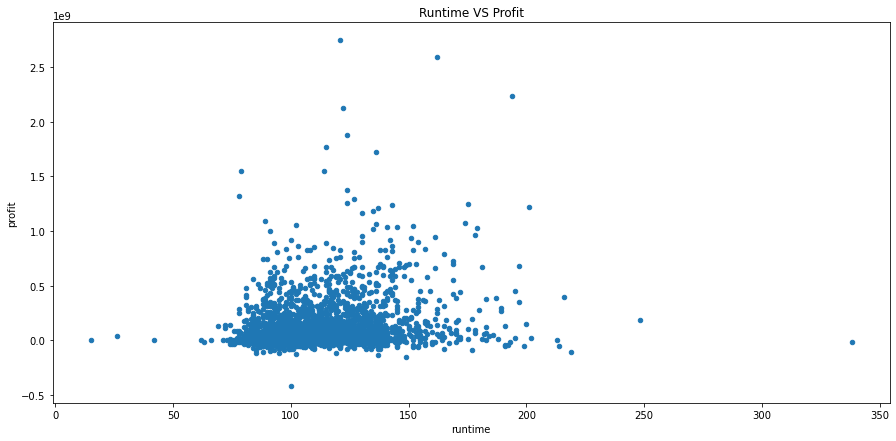

In [34]:
df
df.plot('runtime','profit', kind='scatter',figsize=(15,7))
plt.title('Runtime VS Profit');

>- We notice that movies Profitability dont depend on it's runtime
>- Most of our movies duration are between 80 to 150 Minutes

### Research Question 5  (what's the most popular month in which the movies released?)

In [35]:
df['month'] = df.release_date.dt.month
df.head()

,popularity,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj,profit,month
10170,0.055821,Frank Tashlin,91.0,Comedy,2060-12-18,1960,2.211890e+07,5.234807e+07,3.022917e+07,12
10144,0.947307,Billy Wilder,125.0,Comedy,2060-06-15,1960,2.211890e+07,1.843242e+08,1.622053e+08,6
10143,1.136943,Stanley Kubrick,197.0,Action,2060-10-06,1960,8.847561e+07,4.423780e+08,3.539024e+08,10
10142,1.872132,John Sturges,128.0,Action,2060-10-23,1960,1.474593e+07,3.616441e+07,2.141847e+07,10
10141,2.610362,Alfred Hitchcock,109.0,Drama,2060-08-14,1960,5.949601e+06,2.359350e+08,2.299854e+08,8


In [36]:
popular_month = df.groupby('month')['profit'].count()
profit_month = df.groupby('month')['profit'].mean()

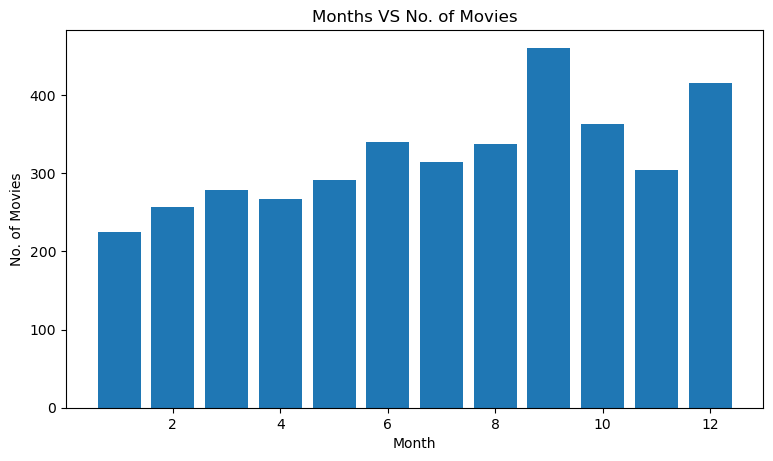

In [37]:
plt.figure(figsize=(9,5), dpi=100)
plt.bar(popular_month.index, popular_month.values)
plt.xlabel('Month')
plt.ylabel('No. of Movies')
plt.title('Months VS No. of Movies');

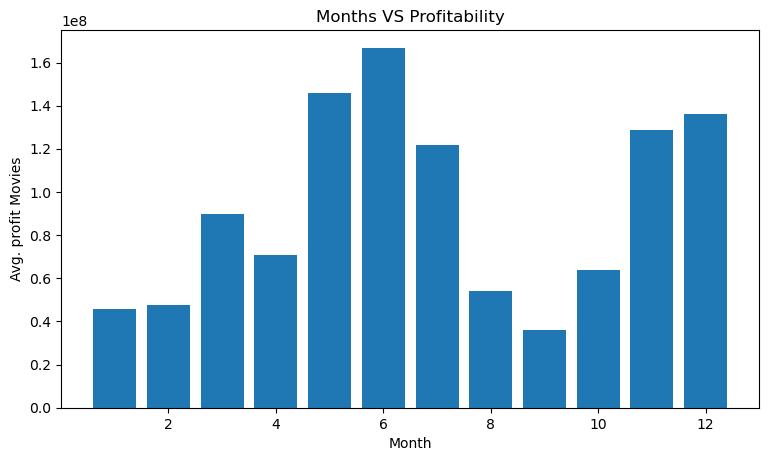

In [38]:
plt.figure(figsize=(9,5), dpi=100)
plt.bar(profit_month.index, profit_month.values)
plt.xlabel('Month')
plt.ylabel('Avg. profit Movies')
plt.title('Months VS Profitability');

>**We notice that `Nov.` and `Dec.` are the most popular month which the Movies released in, While in `May.` and `Jun.`are the highest Profit**

### Research Question 6  (What's the relation between Genres and profitability?)

In [39]:
gen_profit_avg = df.groupby('genres').profit.mean()
gen_profit_avg = gen_profit_avg.sort_values(ascending=False)
gen_movies = df.groupby('genres').profit.count()
gen_movies = gen_movies.sort_values(ascending=False)

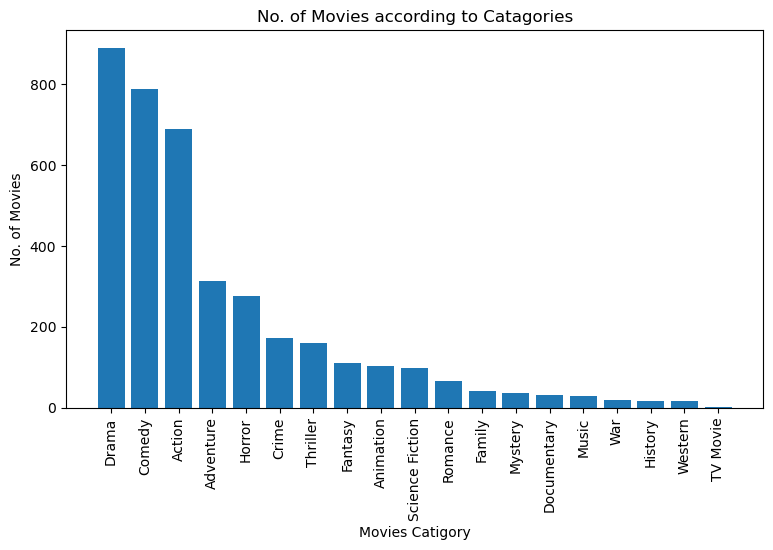

In [40]:
plt.figure(figsize=(9,5), dpi=100)
plt.bar(gen_movies.index, gen_movies.values)
plt.xticks(rotation='90')
plt.xlabel('Movies Catigory')
plt.ylabel('No. of Movies')
plt.title('No. of Movies according to Catagories');

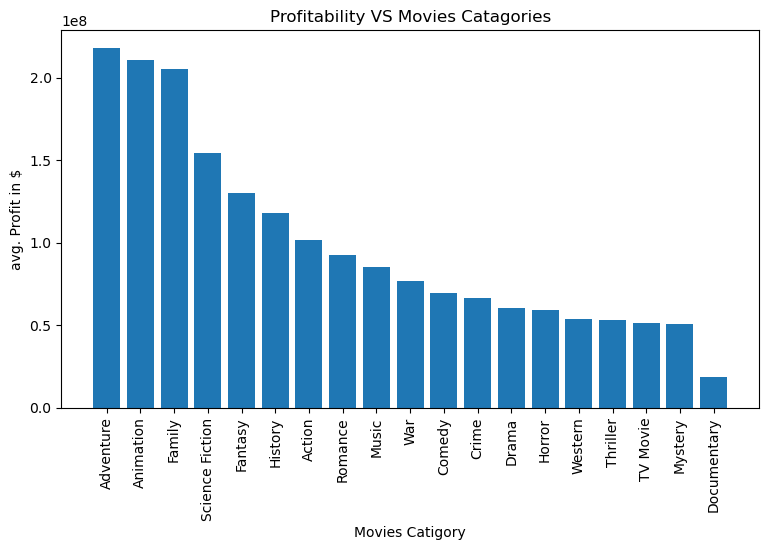

In [41]:
plt.figure(figsize=(9,5), dpi=100)
plt.bar(gen_profit_avg.index, gen_profit_avg.values)
plt.xticks(rotation='90')
plt.xlabel('Movies Catigory')
plt.ylabel('avg. Profit in $')
plt.title('Profitability VS Movies Catagories');

>**It's clear that the most Movies released are *`Drama, Comedy, or Action`* while the most profitable are *`Adventure, Animation, or Family`****

<a id='conclusions'></a>
## Conclusions

> **Finally it's clear that it's a profitable industry to invest in.**


> **For the production Companies I recommend thry have to invest more in `(Adventure, Animation, or Family movies)` and release more in `(May and June)`**

### Limitations
> **There is more movies that don't have revenue or budget data**